In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np  


def load_data(path):
    return pd.read_csv(path)



In [69]:

SessionPath = "c:\\Users\\HugoMarques\\Downloads\\Behavior-20260204T105312Z-3-001\\Behavior\\"
    
StartTriggerData = load_data(SessionPath+"LC_LPE-15852_StartTrigger_2026-02-02T16_35_04.csv")
CameraData = load_data(SessionPath+"LC_LPE-15852_CameraData_2026-02-02T16_35_04.csv")
CameraTriggerData = load_data(SessionPath+"LC_LPE-15852_CameraTrigger_2026-02-02T16_35_04.csv") 
NextFileData = load_data(SessionPath+"LC_LPE-15852_NextFileTrigger_2026-02-02T16_35_04.csv")
ProjectionData = load_data(SessionPath+"LC_LPE-15852_Projection_2026-02-02T16_35_04.csv")
RotaryEncoderData = load_data(SessionPath+"LC_LPE-15852_RotaryEncoder_2026-02-02T16_35_04.csv")
RewardData = load_data(SessionPath+"LC_LPE-15852_Rw_2026-02-02T16_35_04.csv")

Dataframes = [StartTriggerData, CameraData, CameraTriggerData, 
              NextFileData, ProjectionData, RotaryEncoderData, RewardData]

labels = [
    "StartTriggerData", "CameraData", "CameraTriggerData",
    "NextFileData", "ProjectionData", "RotaryEncoderData", "RewardData"
]

# find the initial timestamp t0
tmin = min([df.iloc[:,0].min() for df in Dataframes])
tmax = max([df.iloc[:,0].max() for df in Dataframes])


print(f"Session duration: {tmax - tmin} seconds")
print(f"Total rewards: {len(RewardData['RewardTime'])}")
print()
print("Data collected:")
print(f"StartTriggerData: {list(StartTriggerData.columns)}")
print(f"CameraData: {list(CameraData.columns)}")
print(f"CameraTriggerData: {list(CameraTriggerData.columns)}")
print(f"NextFileData: {list(NextFileData.columns)}")    
print(f"ProjectionData: {list(ProjectionData.columns)}")
print(f"RotaryEncoderData: {list(RotaryEncoderData.columns)}")


print(f"Reward Times: {RewardData['RewardTime']}")

# remove t0 from all timestamps
for df in Dataframes:
    df.iloc[:,0] = df.iloc[:,0] - tmin

#print(StartTriggerData)
#print(CameraTriggerData)

print(f"RewardData: {list(RewardData['RewardTime'])}")

Session duration: 713.503008000087 seconds
Total rewards: 1

Data collected:
StartTriggerData: ['StartTrigger']
CameraData: ['Timestamp', 'FrameNumber', 'ROIValue']
CameraTriggerData: ['CameraTrigger']
NextFileData: ['NextFileTrigger']
ProjectionData: ['Timestamp', 'TotalDistance', 'NextRewardPosition']
RotaryEncoderData: ['Timestamp', 'EncoderVoltage', 'TotalDistance']
Reward Times: 0    3.968342e+06
Name: RewardTime, dtype: float64
RewardData: [477.6270079999231]


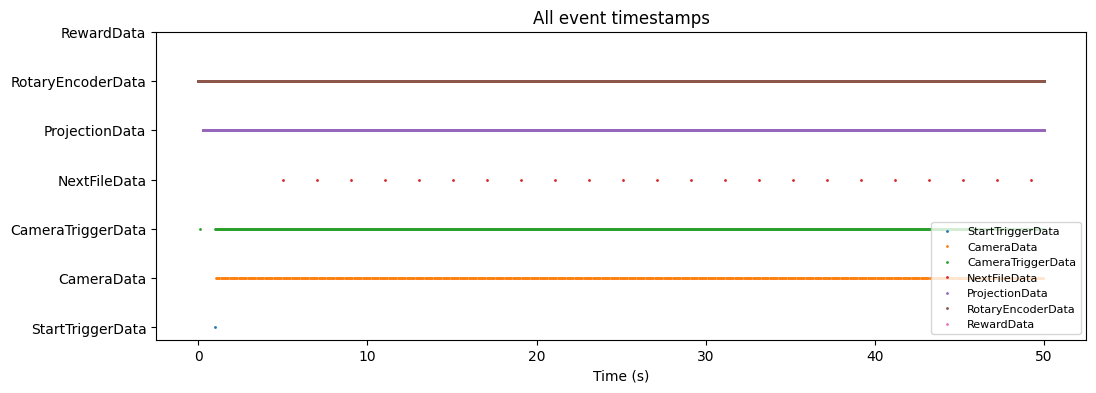

In [71]:
# plot the first 50 seconds of data

plt.figure(figsize=(12, 4))

for i, df in enumerate(Dataframes):
    # mask for first 50 seconds
    #mask = (df.iloc[:,0] <= 500) & (df.iloc[:,0] >= 0.9)
    mask = (df.iloc[:,0] <= 50)
    plt.plot(
        df.loc[mask, df.columns[0]],  # x-values in seconds
        [i+1] * mask.sum(),           # y-values
        marker='.', linestyle='None', label=labels[i], markersize=2
    )

plt.xlabel("Time (s)")
plt.yticks(range(1, len(Dataframes)+1), labels)
plt.title("All event timestamps")
plt.legend(loc="lower right", fontsize=8)
plt.show()




In [77]:
ImagingDT = 8.57 # Hz
data = np.load("c:\\Users\\HugoMarques\\Downloads\\Fneu.npy")
print(data.shape)


(209, 6148)


C:\Users\HugoMarques\AppData\Local\Temp\ipykernel_25384\1178958055.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right", fontsize=8)


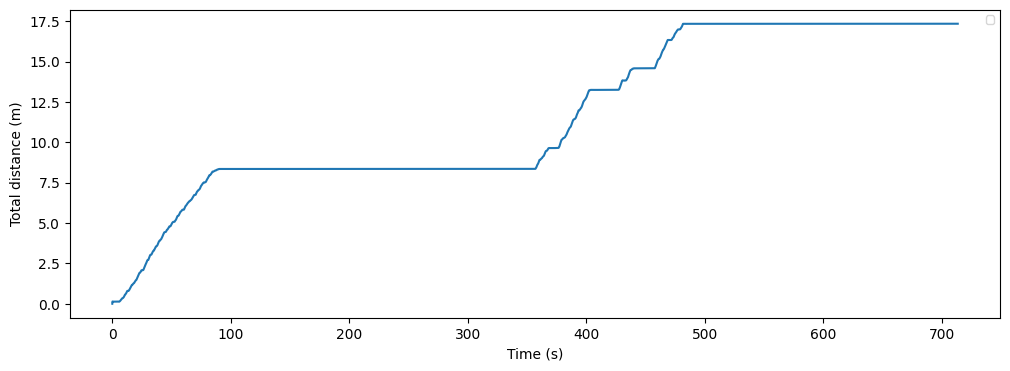

In [45]:
# plot the total distance recorder from the rotary encoder
plt.figure(figsize=(12, 4))

plt.plot(RotaryEncoderData['Timestamp'], RotaryEncoderData['TotalDistance'])
plt.xlabel("Time (s)")
plt.ylabel("Total distance (m)")
plt.legend(loc="upper right", fontsize=8)
plt.show()


C:\Users\HugoMarques\AppData\Local\Temp\ipykernel_25384\397081116.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right", fontsize=8)


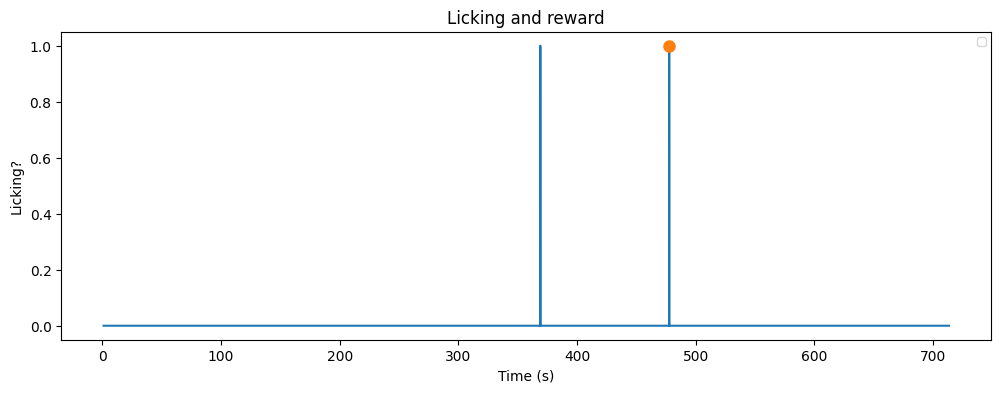

In [67]:
# plot licking behavior
plt.figure(figsize=(12, 4))

plt.plot(CameraData['Timestamp'], CameraData['ROIValue'])
plt.plot(RewardData['RewardTime'], [1] * len(RewardData['RewardTime']), marker='o', linestyle='None', markersize=8)
plt.xlabel("Time (s)")
plt.ylabel("Licking?")
plt.title("Licking and reward")
plt.legend(loc="upper right", fontsize=8)
plt.show()